In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [364]:
def parse_run_name(x):
    dico = {}
    vec = x.split('_')
    dico['Department'] = vec[0]
    dico['Model'] = vec[1]
    i = 2
    if dico['Model']  == 'fwi':
        i += 1
    dico['Target'] = vec[i]
    i += 1
    if dico['Model'] != 'fwi':
        dico['Task_type'] = vec[i]
        i += 1
        dico['loss'] = vec[i]
        i += 1
        if vec[i] == 'features':
            i += 1
    else:
        dico['loss'] = None
        dico['Task_type'] = 'Indice'

    dico['Number_of_samples'] = vec[i]
    i += 1
    dico['k_days'] = vec[i]
    i += 1
    dico['Number_of_features'] = vec[i]
    i += 1
    dico['Scale'] = int(vec[i])
    i += 1
    dico['Base'] = vec[i]
    i += 1
    dico['Method'] = vec[i]

    return dico

### Task Type

In [365]:
metric = 'kendall'
df = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

metric = 'binary_f1'
df1 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

metric = 'spearman'
df2 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

df = df.set_index('Run').join(df1.set_index('Run')['temporal_binary_f1']).reset_index()
df = df.set_index('Run').join(df2.set_index('Run')['temporal_spearman']).reset_index()

df.dropna(subset=['temporal_spearman'], inplace=True)
df.drop_duplicates(subset='Run', inplace=True, keep='first')

In [366]:
# Initialisation des colonnes avec des valeurs None
df['Department'] = None
df['Model'] = None
df['Target'] = None
df['Task_type'] = None
df['Loss_function'] = None
df['Number_of_samples'] = None
df['kdays'] = None
df['Number_of_features'] = None
df['Scale'] = None
df['Base'] = None
df['Method'] = None

# Boucle pour remplir les colonnes avec les valeurs de dico_parse
for index, row in df.iterrows():
    dico_parse = parse_run_name(row['Run'])
    
    # Mise à jour de chaque colonne avec les valeurs du dictionnaire dico_parse
    df.loc[index, 'Department'] = dico_parse.get('Department')
    df.loc[index, 'Model'] = dico_parse.get('Model')
    df.loc[index, 'Target'] = dico_parse.get('Target')
    df.loc[index, 'Task_type'] = dico_parse.get('Task_type')
    df.loc[index, 'Loss_function'] = dico_parse.get('Loss_function')
    df.loc[index, 'Number_of_samples'] = dico_parse.get('Number_of_samples')
    df.loc[index, 'kdays'] = dico_parse.get('kdays')
    df.loc[index, 'Number_of_features'] = dico_parse.get('Number_of_features')
    df.loc[index, 'Scale'] = dico_parse.get('Scale')
    df.loc[index, 'Base'] = dico_parse.get('Base')
    df.loc[index, 'Method'] = dico_parse.get('Method')

df = df[df['Model'] == 'xgboost']

In [367]:
df

,Run,Run ID,temporal_kendall,temporal_binary_f1,temporal_spearman,Department,Model,Target,Task_type,Loss_function,Number_of_samples,kdays,Number_of_features,Scale,Base,Method
2,departement-01-ain_xgboost_nbsinister_regressi...,78db63c2a2684202b8b201f47f21f84a,NaN,NaN,0.245215,departement-01-ain,xgboost,nbsinister,regression,None,full,None,all,5,risk-size-watershed,node
5,departement-78-yvelines_xgboost_nbsinister_reg...,96757872321a45ba94fa2856422af21e,0.332379,0.521739,0.389951,departement-78-yvelines,xgboost,nbsinister,regression,None,full,None,all,5,risk-size-watershed,node
6,departement-25-doubs_xgboost_nbsinister_regres...,66c1df994d1347b79d31943267b10fcd,0.214670,0.343490,0.242186,departement-25-doubs,xgboost,nbsinister,regression,None,full,None,all,5,risk-size-watershed,node
17,departement-78-yvelines_xgboost_nbsinister_reg...,73b1f792aa034868a5a20f4ae4a5bc93,0.280264,0.410072,0.314930,departement-78-yvelines,xgboost,nbsinister,regression,None,full,None,all,4,risk-size-watershed,node
18,departement-25-doubs_xgboost_nbsinister_regres...,74242101cc0947f49a8acf634764460b,0.194341,0.292835,0.210547,departement-25-doubs,xgboost,nbsinister,regression,None,full,None,all,4,risk-size-watershed,node
28,departement-01-ain_xgboost_nbsinister_regressi...,23d3d9ee68374abb9a8863bf6da9b943,0.210652,0.290698,0.240460,departement-01-ain,xgboost,nbsinister,regression,None,full,None,all,4,risk-size-watershed,node
39,departement-78-yvelines_xgboost_nbsinister_reg...,36ad39cd98114f00a87acb5cef43dae4,0.304598,0.535826,0.368965,departement-78-yvelines,xgboost,nbsinister,regression,None,full,None,all,7,risk-regular,node
44,departement-25-doubs_xgboost_nbsinister_regres...,87a813b3d9c842dba6c61427f94688cf,0.245099,0.405195,0.286653,departement-25-doubs,xgboost,nbsinister,regression,None,full,None,all,7,risk-regular,node
45,departement-01-ain_xgboost_nbsinister_regressi...,7e4a950f08194b78868d9abb4a80b37b,0.240438,0.420438,0.287387,departement-01-ain,xgboost,nbsinister,regression,None,full,None,all,7,risk-regular,node
46,departement-78-yvelines_xgboost_nbsinister_reg...,defeea13c4d7463ea7d98cf6d5da7ba8,0.282882,0.505495,0.335866,departement-78-yvelines,xgboost,nbsinister,regression,None,full,None,all,6,risk-regular,node


In [368]:
df.rename({'temporal_binary_f1' : 'F1 score',
           'temporal_kendall' : 'Kendall',
           'temporal_spearman' : 'Spearman'
           }, inplace=True, axis=1)

In [369]:
def parser_task_type(x):
    if x == 'risk':
        return 'Risk prediction'
    elif x == 'nbsinister':
        return 'Sinister prediction'
    elif x == 'binary':
        return 'Probability prediction'

In [370]:
df['task_type'] = df['Target'].apply(lambda x : parser_task_type(x))
df = df.sort_values(['Scale', 'Department'])

In [371]:
def compare_task_type(depts, dept_markers):
    metrics = ['F1 score', 'Spearman', 'Kendall']
    task_types = ['Risk prediction', 'Sinister prediction', 'Probability prediction']
    
    # Define colors for each task type
    task_colors = {
        'Risk prediction': 'c',
        'Sinister prediction': 'm',
        'Probability prediction': 'y'
    }

    # Create a new figure for all departments
    fig, axs = plt.subplots(len(depts), len(metrics), figsize=(15, 3 * len(depts)), sharey='row')

    # Loop through each department
    for dept_index, dept in enumerate(depts):
        # Filtering the DataFrame for a specific department
        df_filtered = df[df['Department'].isin([dept])].reset_index()

        # Loop through each metric to create a subplot for each metric
        for metric_index, metric in enumerate(metrics):
            ax = axs[dept_index, metric_index] if len(depts) > 1 else axs[metric_index]
            for method in task_types:
                subset = df_filtered[df_filtered['task_type'] == method]
                # Add label only for the first occurrence of each method
                label = method if dept_index == 0 else None  # Only show labels for the first department
                ax.plot(subset['Scale'], subset[metric], marker=dept_markers[dept], linestyle='-', 
                        label=label, color=task_colors[method])  # Use task type color

            # Configuration for each subplot
            ax.set_ylim(0, 1)
            ax.set_xlabel('Scale')
            if dept_index == 0:  # Only set the title for the first row
                ax.set_title(f'{metric}', fontsize=12)
            ax.grid(True)

        axs[dept_index, 0].set_ylabel('Metric Value')

    # Create a custom legend for task types and departments
    task_handles = [plt.Line2D([0], [0], color=task_colors[method], label=method) for method in task_types]
    dept_handles = [plt.Line2D([0], [0], marker=dept_markers[dept], linestyle='None', color='black', label=dept) for dept in depts]

    # Combine both legends
    fig.legend(handles=task_handles + dept_handles, loc='center left', bbox_to_anchor=(0.85, 0.85), title="Legend")

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    plt.show()

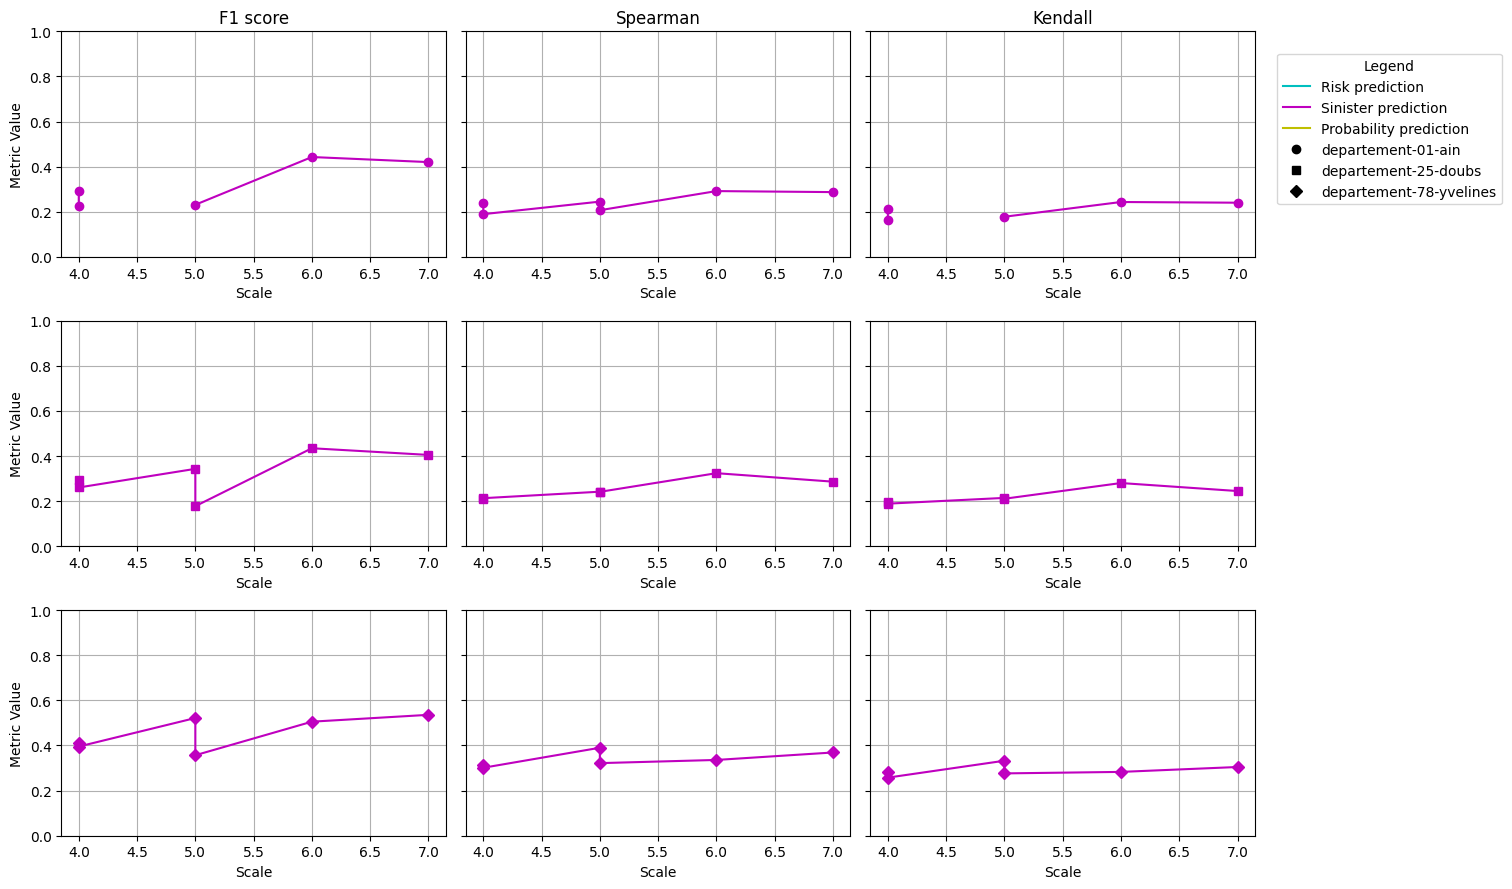

In [372]:
# Define markers for each department
dept_markers = {
    'departement-01-ain': 'o',   # Circle
    'departement-25-doubs': 's',   # Square
    'departement-78-yvelines': 'D',   # Diamond
    # Add more departments and their markers as needed
}
compare_task_type(df.Department.unique(), dept_markers)

### Accuracy

In [373]:
metric = 'accuracy_accuracy'
df = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

df.dropna(subset=['temporal_accuracy_accuracy'], inplace=True)
df.drop_duplicates(inplace=True, keep='first')

In [374]:
# Initialisation des colonnes avec des valeurs None
df['Department'] = None
df['Model'] = None
df['Target'] = None
df['Task_type'] = None
df['Loss_function'] = None
df['Number_of_samples'] = None
df['kdays'] = None
df['Number_of_features'] = None
df['Scale'] = None
df['Base'] = None
df['Method'] = None

# Boucle pour remplir les colonnes avec les valeurs de dico_parse
for index, row in df.iterrows():
    dico_parse = parse_run_name(row['Run'])
    
    # Mise à jour de chaque colonne avec les valeurs du dictionnaire dico_parse
    df.loc[index, 'Department'] = dico_parse.get('Department')
    df.loc[index, 'Model'] = dico_parse.get('Model')
    df.loc[index, 'Target'] = dico_parse.get('Target')
    df.loc[index, 'Task_type'] = dico_parse.get('Task_type')
    df.loc[index, 'Loss_function'] = dico_parse.get('Loss_function')
    df.loc[index, 'Number_of_samples'] = dico_parse.get('Number_of_samples')
    df.loc[index, 'kdays'] = dico_parse.get('kdays')
    df.loc[index, 'Number_of_features'] = dico_parse.get('Number_of_features')
    df.loc[index, 'Scale'] = dico_parse.get('Scale')
    df.loc[index, 'Base'] = dico_parse.get('Base')
    df.loc[index, 'Method'] = dico_parse.get('Method')

df = df[df['Model'] == 'xgboost']

In [375]:
df.rename({'temporal_accuracy_accuracy' : 'Accuracy'}, inplace=True, axis=1)

df['task_type'] = df['Target'].apply(lambda x : parser_task_type(x))
df = df.sort_values('Scale')

In [376]:
def compare_task_type_acc(depts, dept_markers):
    metrics = ['Accuracy']
    task_types = ['xgboost']
    
    # Define colors for each task type
    task_colors = {
        'xgboost': 'm',
    }

    # Create a new figure for all departments
    fig, axs = plt.subplots(len(depts), len(metrics), figsize=(15, 3 * len(depts)), sharey='row')

    # Loop through each department
    for dept_index, dept in enumerate(depts):
        # Filtering the DataFrame for a specific department
        df_filtered = df[df['Department'].isin([dept])].reset_index()

        # Loop through each metric to create a subplot for each metric
        for metric_index, metric in enumerate(metrics):
            ax = axs[dept_index] if len(depts) > 1 else axs[metric_index]
            for method in task_types:
                subset = df_filtered[df_filtered['Model'] == method]
                # Add label only for the first occurrence of each method
                label = method if dept_index == 0 else None  # Only show labels for the first department
                ax.plot(subset['Scale'], subset[metric], marker=dept_markers[dept], linestyle='-', 
                        label=label, color=task_colors[method])  # Use task type color

            # Configuration for each subplot
            ax.set_ylim(0, 1)
            ax.set_xlabel('Scale')
            if dept_index == 0:  # Only set the title for the first row
                ax.set_title(f'{metric}', fontsize=12)
            ax.grid(True)

        axs[dept_index].set_ylabel('Metric Value')

    # Create a custom legend for task types and departments
    task_handles = [plt.Line2D([0], [0], color=task_colors[method], label=method) for method in task_types]
    dept_handles = [plt.Line2D([0], [0], marker=dept_markers[dept], linestyle='None', color='black', label=dept) for dept in depts]

    # Combine both legends
    fig.legend(handles=task_handles + dept_handles, loc='center left', bbox_to_anchor=(0.85, 0.85), title="Legend")

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    plt.show()

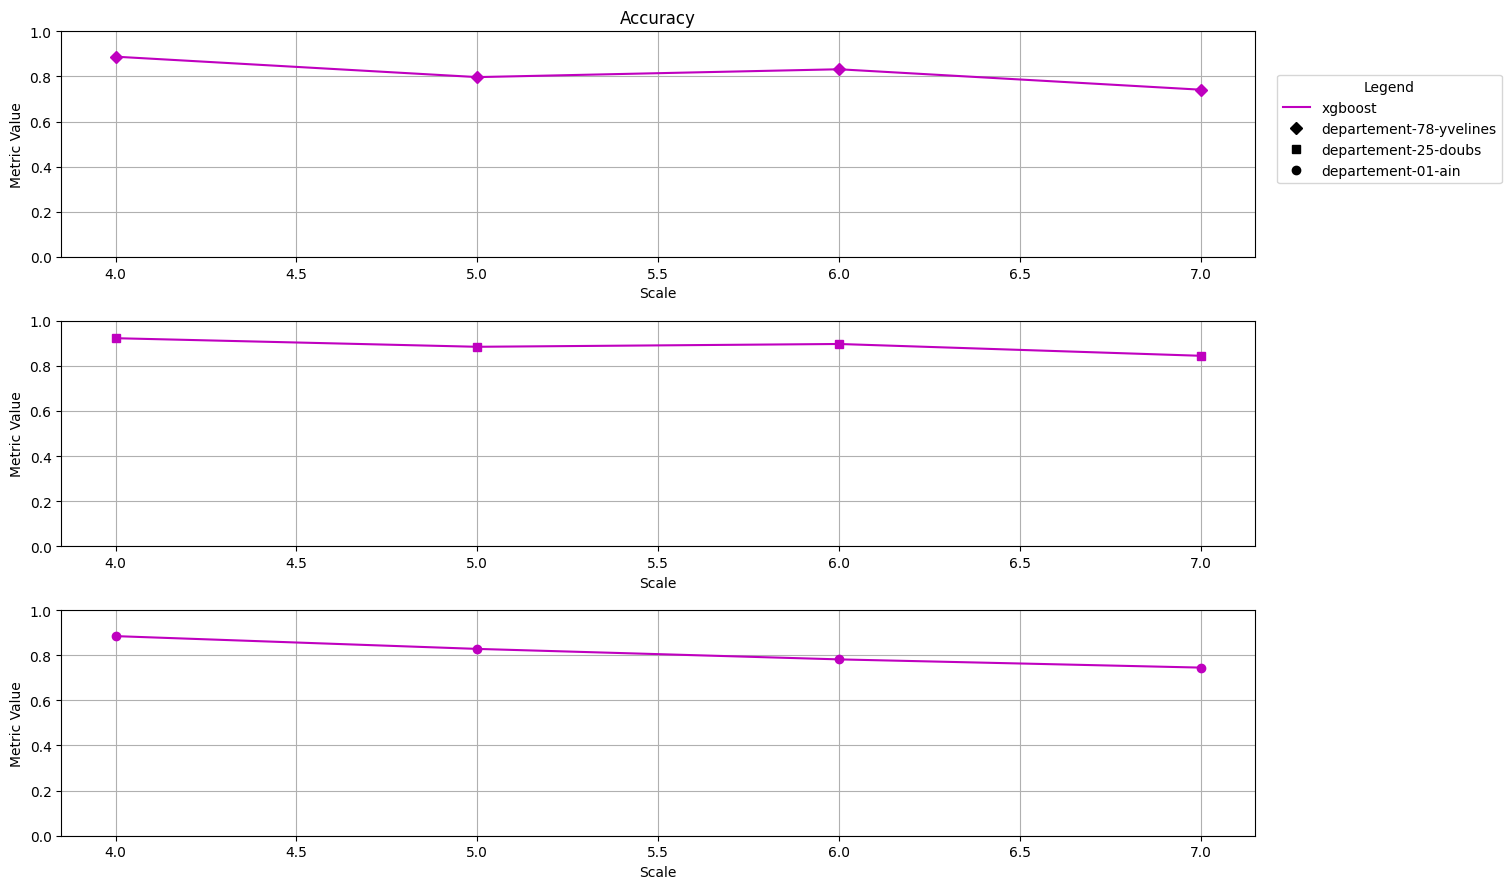

In [377]:
# Define markers for each department
dept_markers = {
    'departement-01-ain': 'o',   # Circle
    'departement-25-doubs': 's',   # Square
    'departement-78-yvelines': 'D',   # Diamond
    # Add more departments and their markers as needed
}
compare_task_type_acc(df.Department.unique(), dept_markers)

### Regular vs Watershed

In [378]:
metric = 'kendall'
df = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

metric = 'binary_f1'
df1 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

metric = 'spearman'
df2 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

df = df.set_index('Run').join(df1.set_index('Run')['temporal_binary_f1']).reset_index()
df = df.set_index('Run').join(df2.set_index('Run')['temporal_spearman']).reset_index()

df.dropna(subset=['temporal_spearman'], inplace=True)
df.drop_duplicates(inplace=True, keep='first')

In [379]:
# Initialisation des colonnes avec des valeurs None
df['Department'] = None
df['Model'] = None
df['Target'] = None
df['Task_type'] = None
df['Loss_function'] = None
df['Number_of_samples'] = None
df['kdays'] = None
df['Number_of_features'] = None
df['Scale'] = None
df['Base'] = None
df['Method'] = None

# Boucle pour remplir les colonnes avec les valeurs de dico_parse
for index, row in df.iterrows():
    dico_parse = parse_run_name(row['Run'])
    
    # Mise à jour de chaque colonne avec les valeurs du dictionnaire dico_parse
    df.loc[index, 'Department'] = dico_parse.get('Department')
    df.loc[index, 'Model'] = dico_parse.get('Model')
    df.loc[index, 'Target'] = dico_parse.get('Target')
    df.loc[index, 'Task_type'] = dico_parse.get('Task_type')
    df.loc[index, 'Loss_function'] = dico_parse.get('Loss_function')
    df.loc[index, 'Number_of_samples'] = dico_parse.get('Number_of_samples')
    df.loc[index, 'kdays'] = dico_parse.get('kdays')
    df.loc[index, 'Number_of_features'] = dico_parse.get('Number_of_features')
    df.loc[index, 'Scale'] = dico_parse.get('Scale')
    df.loc[index, 'Base'] = dico_parse.get('Base')
    df.loc[index, 'Method'] = dico_parse.get('Method')

df = df[df['Model'] == 'xgboost']

In [380]:
df

,Run,Run ID,temporal_kendall,temporal_binary_f1,temporal_spearman,Department,Model,Target,Task_type,Loss_function,Number_of_samples,kdays,Number_of_features,Scale,Base,Method
2,departement-01-ain_xgboost_nbsinister_regressi...,78db63c2a2684202b8b201f47f21f84a,NaN,NaN,0.245215,departement-01-ain,xgboost,nbsinister,regression,None,full,None,all,5,risk-size-watershed,node
4,departement-01-ain_xgboost_nbsinister_regressi...,78db63c2a2684202b8b201f47f21f84a,NaN,0.324493,0.245215,departement-01-ain,xgboost,nbsinister,regression,None,full,None,all,5,risk-size-watershed,node
5,departement-78-yvelines_xgboost_nbsinister_reg...,96757872321a45ba94fa2856422af21e,0.332379,0.521739,0.389951,departement-78-yvelines,xgboost,nbsinister,regression,None,full,None,all,5,risk-size-watershed,node
6,departement-25-doubs_xgboost_nbsinister_regres...,66c1df994d1347b79d31943267b10fcd,0.214670,0.343490,0.242186,departement-25-doubs,xgboost,nbsinister,regression,None,full,None,all,5,risk-size-watershed,node
8,departement-01-ain_xgboost_nbsinister_regressi...,97bdcbeea4e7488d8ea661c5b6eaa06a,0.210346,NaN,0.245215,departement-01-ain,xgboost,nbsinister,regression,None,full,None,all,5,risk-size-watershed,node
10,departement-01-ain_xgboost_nbsinister_regressi...,97bdcbeea4e7488d8ea661c5b6eaa06a,0.210346,0.324493,0.245215,departement-01-ain,xgboost,nbsinister,regression,None,full,None,all,5,risk-size-watershed,node
17,departement-78-yvelines_xgboost_nbsinister_reg...,73b1f792aa034868a5a20f4ae4a5bc93,0.280264,0.410072,0.314930,departement-78-yvelines,xgboost,nbsinister,regression,None,full,None,all,4,risk-size-watershed,node
18,departement-25-doubs_xgboost_nbsinister_regres...,74242101cc0947f49a8acf634764460b,0.194341,0.292835,0.210547,departement-25-doubs,xgboost,nbsinister,regression,None,full,None,all,4,risk-size-watershed,node
28,departement-01-ain_xgboost_nbsinister_regressi...,23d3d9ee68374abb9a8863bf6da9b943,0.210652,0.290698,0.240460,departement-01-ain,xgboost,nbsinister,regression,None,full,None,all,4,risk-size-watershed,node
39,departement-78-yvelines_xgboost_nbsinister_reg...,36ad39cd98114f00a87acb5cef43dae4,0.304598,0.535826,0.368965,departement-78-yvelines,xgboost,nbsinister,regression,None,full,None,all,7,risk-regular,node


In [381]:
df.loc[df[df['Base'] == 'risk-size-watershed'].index, 'Base'] = 'Watershed'
df.loc[df[df['Base'] == 'risk-regular'].index, 'Base'] = 'Regular'

In [382]:
df.rename({'temporal_binary_f1' : 'F1 score',
           'temporal_kendall' : 'Kendall',
           'temporal_spearman' : 'Spearman'
           }, inplace=True, axis=1)
df = df.sort_values(['Scale', 'Department'])

In [383]:
def compare_segmentation(depts, dept_markers):
    metrics = ['F1 score', 'Spearman', 'Kendall']
    task_types = ['Watershed', 'Regular']
    
    # Define colors for each task type
    task_colors = {
        'Watershed': 'c',
        'Regular': 'y',
    }

    # Create a new figure for all departments
    fig, axs = plt.subplots(len(depts), len(metrics), figsize=(15, 3 * len(depts)), sharey='row')

    # Loop through each department
    for dept_index, dept in enumerate(depts):
        # Filtering the DataFrame for a specific department
        df_filtered = df[df['Department'].isin([dept])].reset_index()

        # Loop through each metric to create a subplot for each metric
        for metric_index, metric in enumerate(metrics):
            ax = axs[dept_index, metric_index] if len(depts) > 1 else axs[metric_index]
            for method in task_types:
                subset = df_filtered[df_filtered['Base'] == method]
                # Add label only for the first occurrence of each method
                label = method if dept_index == 0 else None  # Only show labels for the first department
                ax.plot(subset['Scale'], subset[metric], marker=dept_markers[dept], linestyle='-', 
                        label=label, color=task_colors[method])  # Use task type color

            # Configuration for each subplot
            ax.set_ylim(0, 1)
            ax.set_xlabel('Scale')
            if dept_index == 0:  # Only set the title for the first row
                ax.set_title(f'{metric}', fontsize=12)
            ax.grid(True)

        axs[dept_index, 0].set_ylabel('Metric Value')

    # Create a custom legend for task types and departments
    task_handles = [plt.Line2D([0], [0], color=task_colors[method], label=method) for method in task_types]
    dept_handles = [plt.Line2D([0], [0], marker=dept_markers[dept], linestyle='None', color='black', label=dept) for dept in depts]

    # Combine both legends
    fig.legend(handles=task_handles + dept_handles, loc='center left', bbox_to_anchor=(0.85, 0.85), title="Legend")

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    plt.show()

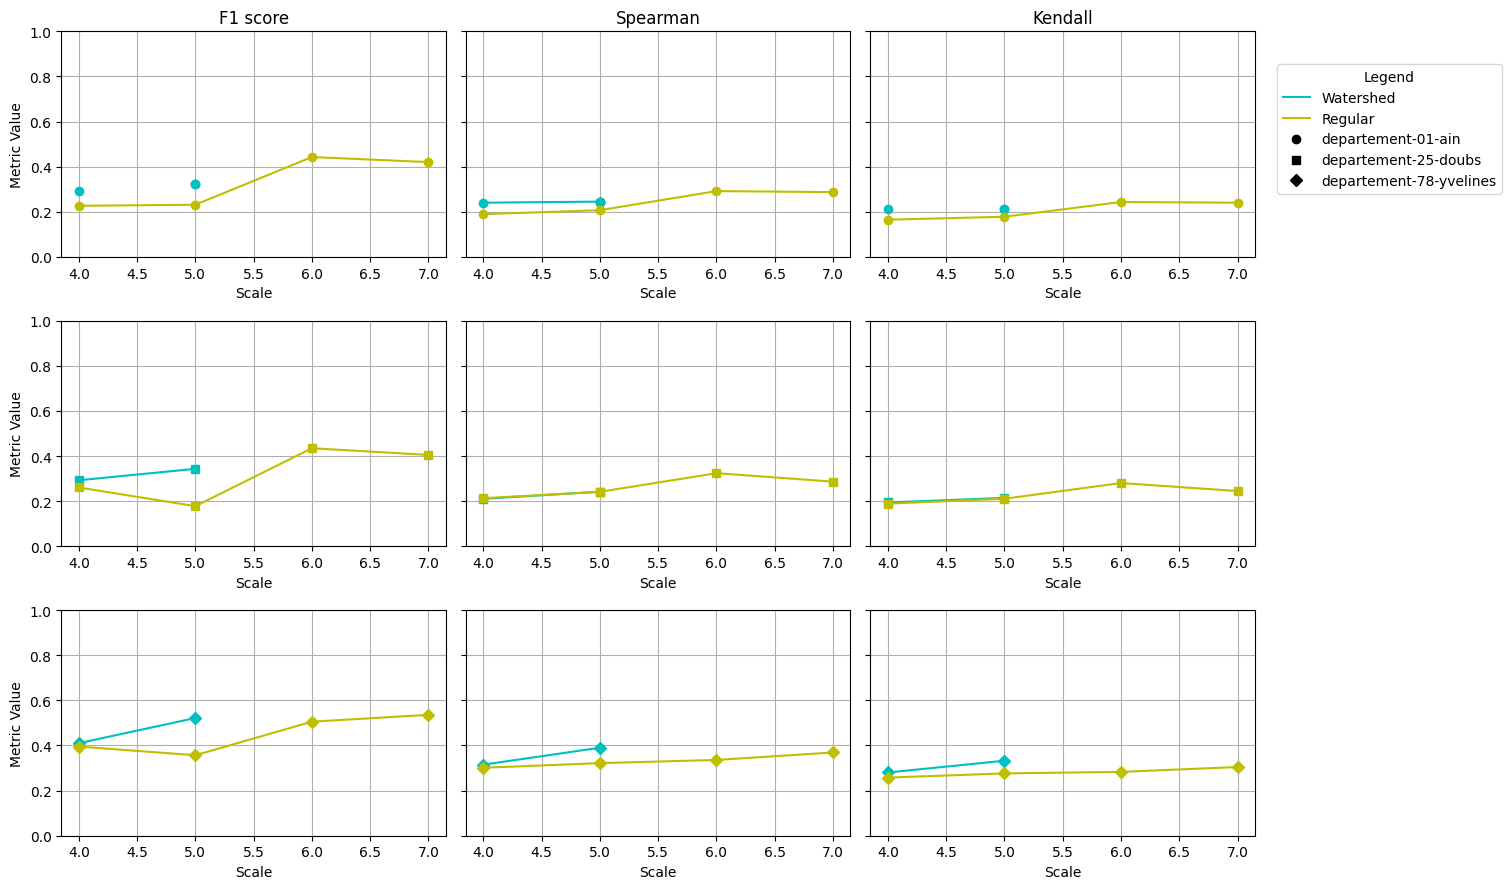

In [384]:
# Define markers for each department
dept_markers = {
    'departement-01-ain': 'o',   # Circle
    'departement-25-doubs': 's',   # Square
    'departement-78-yvelines': 'D',   # Diamond
    # Add more departments and their markers as needed
}
compare_segmentation(df.Department.unique(), dept_markers)

### Models

In [385]:
metric = 'kendall'
df = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

metric = 'binary_f1'
df1 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

metric = 'spearman'
df2 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

metric = 'mae'
df4 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

metric = 'binary_precision'
df5 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

metric = 'binary_recall'
df6 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

metric = 'pearson'
df7 = pd.read_csv(f'/home/caron/Bureau/Image_CVPR/temporal_{metric}.csv')

df = df.set_index('Run').join(df1.set_index('Run')['temporal_binary_f1']).reset_index()
df = df.set_index('Run').join(df2.set_index('Run')['temporal_spearman']).reset_index()
df = df.set_index('Run').join(df4.set_index('Run')['temporal_mae']).reset_index()
df = df.set_index('Run').join(df5.set_index('Run')['temporal_binary_precision']).reset_index()
df = df.set_index('Run').join(df6.set_index('Run')['temporal_binary_recall']).reset_index()
df = df.set_index('Run').join(df7.set_index('Run')['temporal_pearson']).reset_index()

df.dropna(subset=['temporal_spearman', 'temporal_mae', 'temporal_binary_f1', 'temporal_kendall'], inplace=True)
df.drop_duplicates(inplace=True, keep='first')
df.reset_index(drop=True, inplace=True)

In [386]:
df.loc[3]['Run']

'departement-01-ain_xgboost_nbsinister_regression_rmse_features_full_0_all_5_risk-size-watershed_node_None_weight_outlier_3'

In [387]:
df.loc[0]['Run']

'departement-78-yvelines_xgboost_nbsinister_regression_rmse_features_full_0_all_5_risk-size-watershed_node_None_weight_outlier_3'

In [388]:
# Initialisation des colonnes avec des valeurs None
df['Department'] = None
df['Model'] = None
df['Target'] = None
df['Task_type'] = None
df['Loss_function'] = None
df['Number_of_samples'] = None
df['kdays'] = None
df['Number_of_features'] = None
df['Scale'] = None
df['Base'] = None
df['Method'] = None

# Boucle pour remplir les colonnes avec les valeurs de dico_parse
for index, row in df.iterrows():
    dico_parse = parse_run_name(row['Run'])
    
    # Mise à jour de chaque colonne avec les valeurs du dictionnaire dico_parse
    df.loc[index, 'Department'] = dico_parse.get('Department')
    df.loc[index, 'Model'] = dico_parse.get('Model')
    df.loc[index, 'Target'] = dico_parse.get('Target')
    df.loc[index, 'Task_type'] = dico_parse.get('Task_type')
    df.loc[index, 'Loss_function'] = dico_parse.get('Loss_function')
    df.loc[index, 'Number_of_samples'] = dico_parse.get('Number_of_samples')
    df.loc[index, 'kdays'] = dico_parse.get('kdays')
    df.loc[index, 'Number_of_features'] = dico_parse.get('Number_of_features')
    df.loc[index, 'Scale'] = dico_parse.get('Scale')
    df.loc[index, 'Base'] = dico_parse.get('Base')
    df.loc[index, 'Method'] = dico_parse.get('Method')

df = df[df['Base'] == 'risk-size-watershed']

In [390]:
df.rename({'temporal_binary_f1' : 'F1 score',
           'temporal_binary_precision' : 'Precision',
           'temporal_binary_recall' : 'Recall',
           'temporal_kendall' : 'Kendall',
           'temporal_spearman' : 'Spearman',
           'temporal_pearson' : 'Pearson',
           'temporal_mae' : 'MAE'
           }, inplace=True, axis=1)

df = df.sort_values(['Scale', 'Department']).reset_index(drop=True)
df.loc[df[df['Model'] == "Zhang"].index, 'Model'] = 'ConvNet'
df.loc[df[df['Model'] == "pastinfluence"].index, 'Model'] = 'Persis'
df.drop_duplicates(inplace=True)

In [391]:
def compare_models2(depts, dept_markers, metrics):
    task_types = ['xgboost', 'gam', 'ConvNet', 'GAT', 'ST-DGATD', 'Persis', 'fwi']

    # Define colors for each task type
    task_colors = {
        'xgboost': 'c',
        'gam': 'b',
        'ConvNet': 'r',
        'GAT': 'green',
        'ST-DGATD': 'black',
        'Persis': 'purple',
        'fwi': 'r'
    }

    # Create a new figure for all departments
    fig, axs = plt.subplots(len(depts), len(metrics), figsize=(15, 3 * len(depts)), sharey='row')

    # Loop through each department
    for dept_index, dept in enumerate(depts):
        # Filtering the DataFrame for a specific department
        df_filtered = df[df['Department'].isin([dept])].reset_index()

        # Loop through each metric to create a subplot for each metric
        for metric_index, metric in enumerate(metrics):
            ax = axs[dept_index, metric_index] if len(depts) > 1 else axs[metric_index]
            for method in task_types:
                subset = df_filtered[df_filtered['Model'] == method]

                if len(subset) == 0:
                    continue

                subset = subset.sort_values('Scale')
                print(subset['Scale'].values)
                # Add label only for the first occurrence of each method
                label = method if dept_index == 0 else None  # Only show labels for the first department
                ax.plot(subset['Scale'].values, subset[metric].values, marker=dept_markers[dept], linestyle='-', 
                        label=label, color=task_colors[method])  # Use task type color

            # Configuration for each subplot
            ax.set_ylim(0, 1)
            ax.set_xlabel('Scale')
            if dept_index == 0:  # Only set the title for the first row
                ax.set_title(f'{metric}', fontsize=12)
            ax.grid(True)

        axs[dept_index, 0].set_ylabel('Metric Value')

    # Create a custom legend for task types and departments
    task_handles = [plt.Line2D([0], [0], color=task_colors[method], label=method) for method in task_types]
    dept_handles = [plt.Line2D([0], [0], marker=dept_markers[dept], linestyle='None', color='black', label=dept) for dept in depts]

    # Combine both legends
    fig.legend(handles=task_handles + dept_handles, loc='center left', bbox_to_anchor=(0.85, 0.85), title="Legend")

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    plt.show()

In [392]:
def compare_models(depts, dept_markers):
    metrics = ['MAE', 'F1 score', 'Spearman', 'Kendall']
    task_types = ['xgboost', 'gam', 'ConvNet', 'GAT', 'ST-DGATD', 'Persis', 'fwi', 'GT']
    
    # Create a new figure for all departments
    fig, axs = plt.subplots(len(depts), len(metrics), figsize=(25, 3 * len(depts)), sharey='row')

    # Loop through each department
    for dept_index, dept in enumerate(depts):
        # Filtering the DataFrame for a specific department
        df_filtered = df[df['Department'].isin([dept])].reset_index()

        # Loop through each metric to create a subplot for each metric
        for metric_index, metric in enumerate(metrics):
            ax = axs[dept_index, metric_index] if len(depts) > 1 else axs[metric_index]
            
            # Loop through all models and plot them
            for method in task_types:
                # Skip specific conditions (e.g., 'fwi' and 'mae')
                if (method == 'fwi' or method == 'Persis' or method == 'GT') and metric == 'MAE':
                    continue
                # Filter the subset of the data for the specific model
                subset = df_filtered[df_filtered['Model'] == method]

                subset = subset.sort_values('Scale')

                if len(subset) == 0:
                    continue
                
                # Retrieve the metric value and apply the cap if necessary
                metric_value = subset[metric].values[0]
                capped_value = min(metric_value, 1.0)  # Cap value at 1.0 for plotting

                # Plot the metric for the model
                ax.plot(subset['Model'].values[0], capped_value, marker=dept_markers[dept], linestyle='-', c='b')

                # If the metric value exceeds 1.0, add a text label showing the original value
                if metric_value > 1.0:
                    ax.text(subset['Model'].values[0], 0.95, f'{metric_value:.2f}', 
                            ha='center', va='top', fontsize=10, color='blue')

            # Set metric names and labels
            ax.set_ylim(0, 1.05)
            ax.set_xlabel('Model')
            
            if dept_index == 0:  # Only set the title for the first row
                ax.set_title(f'{metric}', fontsize=12)
            ax.grid(True)

        axs[dept_index, 0].set_ylabel('Metric Value')

    # Create a custom legend for departments only (model names are now on X-axis)
    dept_handles = [plt.Line2D([0], [0], marker=dept_markers[dept], linestyle='None', color='black', label=dept) for dept in depts]

    # Combine legends (only departments now)
    fig.legend(handles=dept_handles, loc='center left', bbox_to_anchor=(0.85, 0.85), title="Legend")
    plt.legend()
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    plt.show()

[4 5 5 5 5 5 5 5 5]
[4 5 6 7]
[4 5 5 5 5 5 5 5 5 6 7]
[4 5 6 7]
[4 5 5 5 5 5 5 5 5]
[4 5 6 7]
[4 5 5 5 5 5 5 5 5 6 7]
[4 5 6 7]
[4 5 5 5 5 5 5 5 5]
[4 5 6 7]
[4 5 5 5 5 5 5 5 5 6 7]
[4 5 6 7]
[4 5]
[4 5 6 7]
[4 4 5 5 6 7]
[4 5 6 7]
[4 5]
[4 5 6 7]
[4 4 5 5 6 7]
[4 5 6 7]
[4 5]
[4 5 6 7]
[4 4 5 5 6 7]
[4 5 6 7]
[4 5]
[4 5 6 7]
[4 5 6 7]
[4 5 6 7]
[4 5]
[4 5 6 7]
[4 5 6 7]
[4 5 6 7]
[4 5]
[4 5 6 7]
[4 5 6 7]
[4 5 6 7]


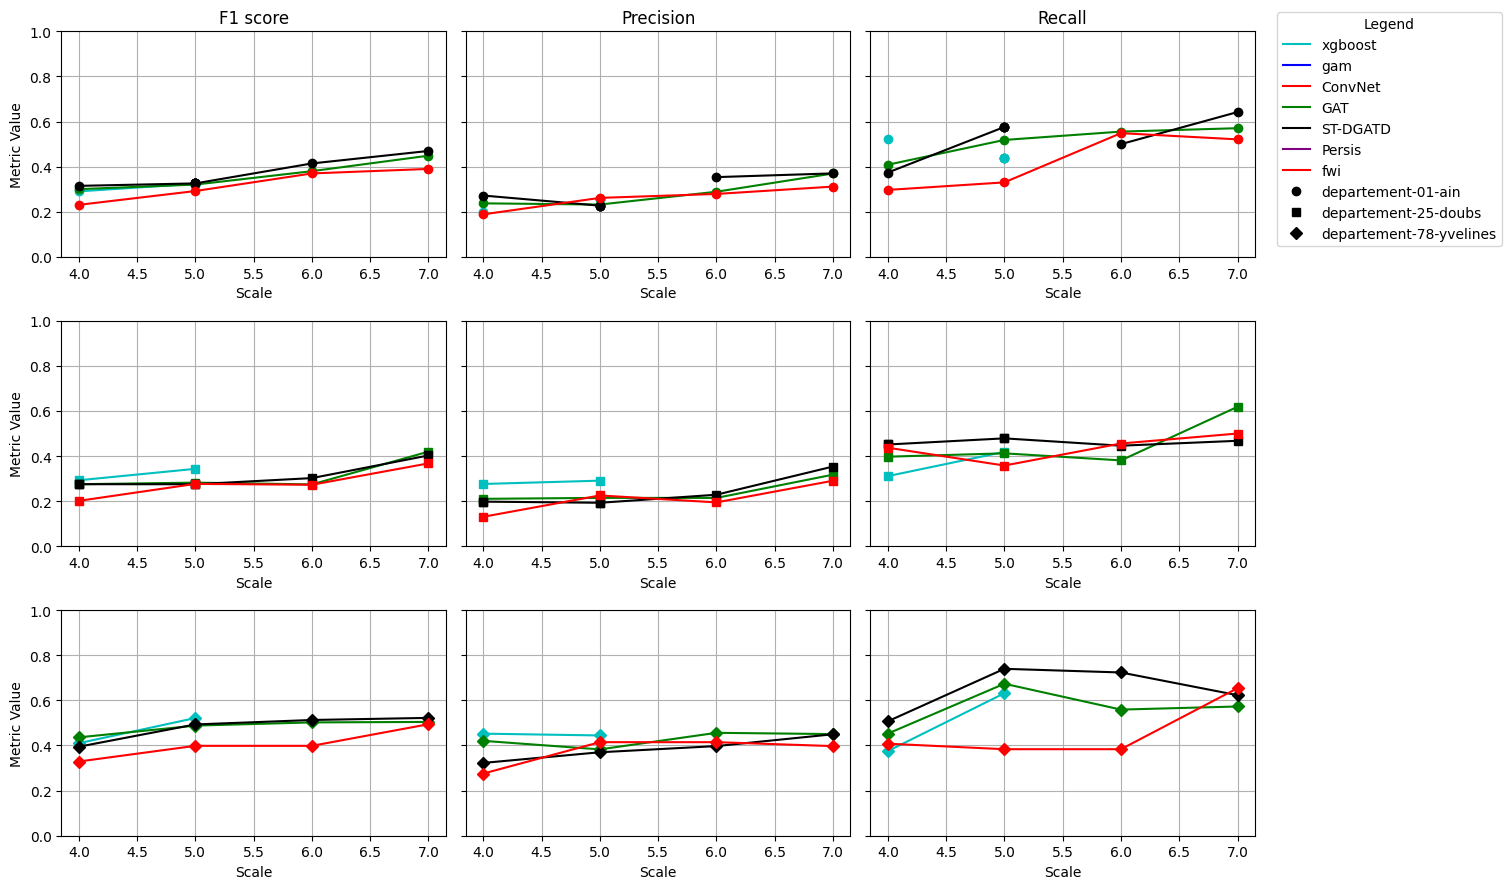

In [393]:
# Define markers for each department
dept_markers = {
    'departement-01-ain': 'o',   # Circle
    'departement-25-doubs': 's',   # Square
    'departement-78-yvelines': 'D',   # Diamond
    # Add more departments and their markers as needed
}
metrics = ['F1 score', 'Precision', 'Recall']

compare_models2(df.Department.unique(), dept_markers, metrics)

[4 5 5 5 5 5 5 5 5]
[4 5 6 7]
[4 5 5 5 5 5 5 5 5 6 7]
[4 5 6 7]
[4 5 5 5 5 5 5 5 5]
[4 5 6 7]
[4 5 5 5 5 5 5 5 5 6 7]
[4 5 6 7]
[4 5 5 5 5 5 5 5 5]
[4 5 6 7]
[4 5 5 5 5 5 5 5 5 6 7]
[4 5 6 7]
[4 5]
[4 5 6 7]
[4 4 5 5 6 7]
[4 5 6 7]
[4 5]
[4 5 6 7]
[4 4 5 5 6 7]
[4 5 6 7]
[4 5]
[4 5 6 7]
[4 4 5 5 6 7]
[4 5 6 7]
[4 5]
[4 5 6 7]
[4 5 6 7]
[4 5 6 7]
[4 5]
[4 5 6 7]
[4 5 6 7]
[4 5 6 7]
[4 5]
[4 5 6 7]
[4 5 6 7]
[4 5 6 7]


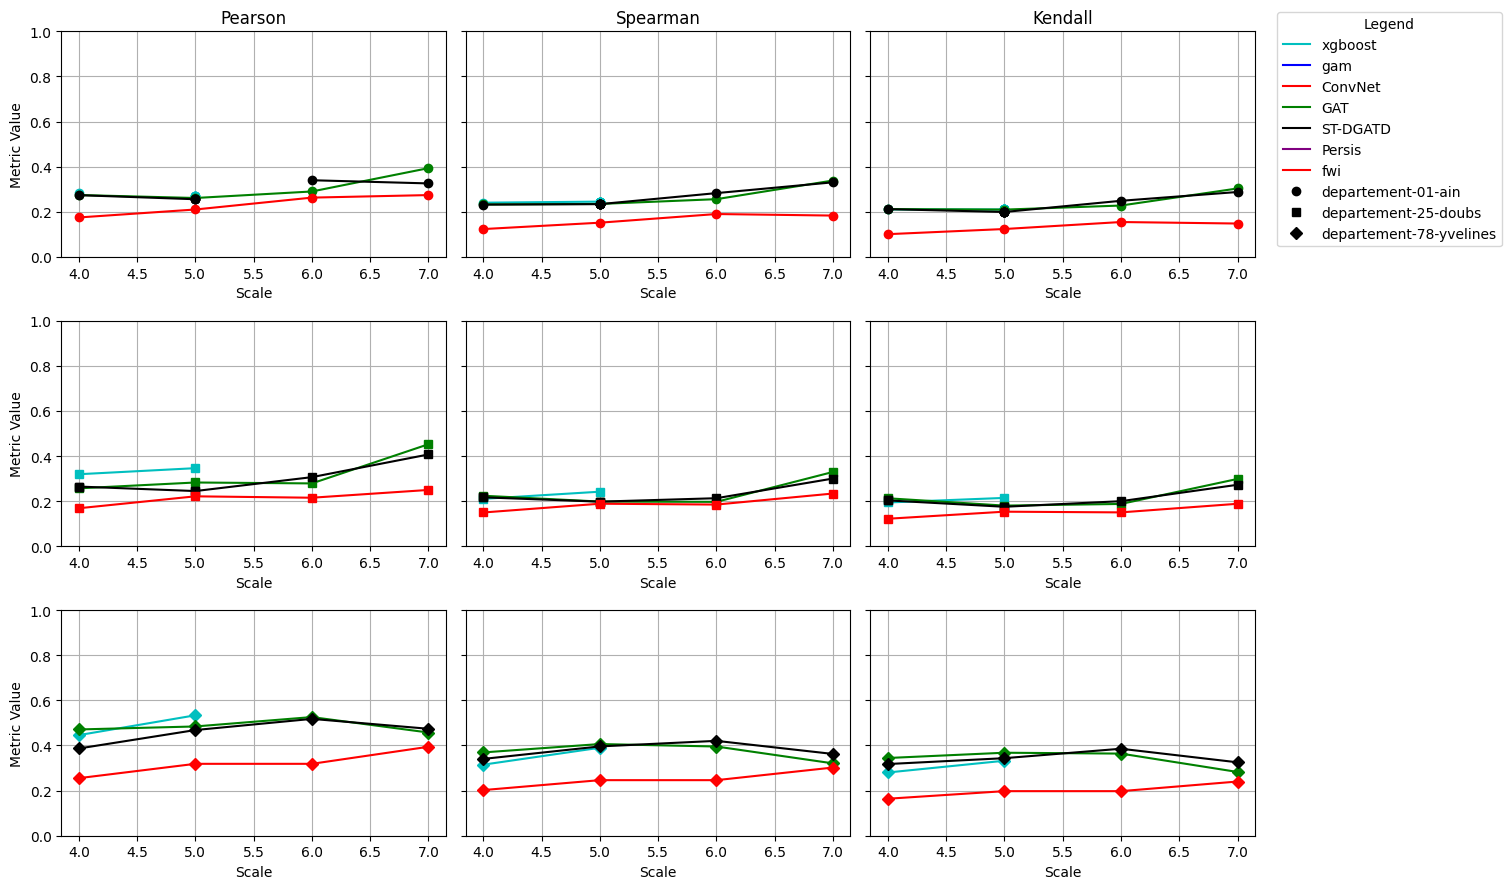

In [394]:
# Define markers for each department
dept_markers = {
    'departement-01-ain': 'o',   # Circle
    'departement-25-doubs': 's',   # Square
    'departement-78-yvelines': 'D',   # Diamond
    # Add more departments and their markers as needed
}
metrics = ['Pearson', 'Spearman', 'Kendall']

compare_models2(df.Department.unique(), dept_markers, metrics)

###